## Simple example of TuRBO-1

In [2]:
from turbo_1 import Turbo1
import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt

## Set up an optimization problem class

In [3]:
class Levy:
    def __init__(self, dim=10):
        self.dim = dim
        self.lb = -2 * np.ones(dim)
        self.ub = 2 * np.ones(dim)
        
    def __call__(self, x):
        assert len(x) == self.dim
        assert x.ndim == 1
        assert np.all(x <= self.ub) and np.all(x >= self.lb)
        w = 1 + (x - 1.0) / 4.0
        val = np.sin(np.pi * w[0]) ** 2 + \
            np.sum((w[1:self.dim - 1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * w[1:self.dim - 1] + 1) ** 2)) + \
            (w[self.dim - 1] - 1) ** 2 * (1 + np.sin(2 * np.pi * w[self.dim - 1])**2)
        return val

f = Levy(10)

## Create a Turbo optimizer instance

In [4]:
turbo1 = Turbo1(
    f=f,  # Handle to objective function
    lb=f.lb,  # Numpy array specifying lower bounds
    ub=f.ub,  # Numpy array specifying upper bounds
    n_init=5,  # Number of initial bounds from an Latin hypercube design
    max_evals = 150,  # Maximum number of evaluations
    batch_size=1,  # How large batch size TuRBO uses
    verbose=True,  # Print information from each batch
    use_ard=False,  # Set to true if you want to use ARD for the GP kernel
    max_cholesky_size=2000,  # When we switch from Cholesky to Lanczos
    n_training_steps=50,  # Number of steps of ADAM to learn the hypers
    min_cuda=1024,  # Run on the CPU for small datasets
    device="cpu",  # "cpu" or "cuda"
    dtype="float64",  # float64 or float32
)

Using dtype = torch.float64 
Using device = cpu


# Run the optimization process

In [5]:
turbo1.optimize()

Starting from fbest = 3.037
14) New best: 1.797
19) New best: 1.635
30) New best: 1.624
33) New best: 1.38
36) New best: 1.357
42) New best: 1.074
50) New best: 0.9234
65) New best: 0.9117
68) New best: 0.8009
73) New best: 0.7947
87) New best: 0.7886
88) New best: 0.7727
90) New best: 0.7067
91) New best: 0.6977
100) New best: 0.6676
108) New best: 0.6431
113) New best: 0.6428
115) New best: 0.6332
124) New best: 0.6285
135) New best: 0.5918
143) New best: 0.5738


## Extract all evaluations from Turbo and print the best

In [15]:
X = turbo1.X  # Evaluated points
fX = turbo1.fX  # Observed values
ind_best = np.argmin(fX)
print(turbo1.X[:3])
print(np.vstack((turbo1.X[0:10],turbo1.X[0:10])))

f_best, x_best = fX[ind_best], X[ind_best, :]
print("Best value found:\n\tf(x) = %.3f\nObserved at:\n\tx = %s" % (f_best, np.around(x_best, 3)))

[[-0.68672286 -1.90589407 -0.57731395 -0.58040392 -1.28166908  1.10879123
   0.38928768 -0.58237239  1.130742    1.06123606]
 [-0.16558073  0.37770551  1.68659163 -1.67403685  0.43385632 -1.7995288
   1.54372719  0.16582041 -1.74176136  0.21047725]
 [ 0.7408176   1.5268353  -1.27762685  0.06096293 -0.20800681 -1.13556538
  -1.88409799  1.28171467  1.31880612 -0.69695357]]
[[-0.68672286 -1.90589407 -0.57731395 -0.58040392 -1.28166908  1.10879123
   0.38928768 -0.58237239  1.130742    1.06123606]
 [-0.16558073  0.37770551  1.68659163 -1.67403685  0.43385632 -1.7995288
   1.54372719  0.16582041 -1.74176136  0.21047725]
 [ 0.7408176   1.5268353  -1.27762685  0.06096293 -0.20800681 -1.13556538
  -1.88409799  1.28171467  1.31880612 -0.69695357]
 [-1.29350282  0.44483731 -0.1034707   0.51485985  1.21721504  1.90635335
  -0.48659766  0.9336267  -0.5402676  -1.75981762]
 [ 1.87556478 -0.96773012  1.06298128  1.37751522 -0.9418362   0.36772882
   0.49682711 -1.54394727  0.12749131  1.34243847]
 

## Plot the progress
Each trust region is independent and finds different solutions

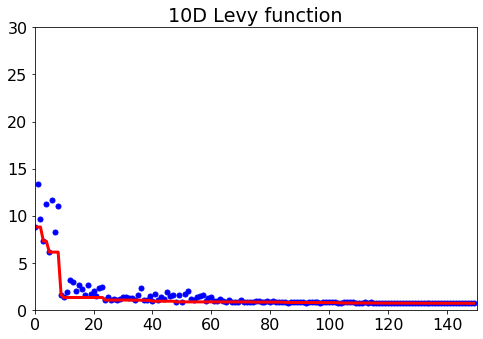

In [34]:
fig = plt.figure(figsize=(7, 5))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(fX, 'b.', ms=10)  # Plot all evaluated points as blue dots
plt.plot(np.minimum.accumulate(fX), 'r', lw=3)  # Plot cumulative minimum as a red line
plt.xlim([0, len(fX)])
plt.ylim([0, 30])
plt.title("10D Levy function")

plt.tight_layout()
plt.show()